# K-Nearest Neighbors


## Objetivos

Depois de concluir este laboratório, você será capaz de:

Use K vizinhos mais próximos para classificar dados

**K-Nearest Neighbors** é um algoritmo de aprendizado supervisionado. Onde os dados são 'treinados' com pontos de dados correspondentes à sua classificação. Para prever a classe de um determinado ponto de dados, ele leva em consideração as classes dos 'K' pontos de dados mais próximos e escolhe a classe à qual pertence a maioria dos 'K' pontos de dados mais próximos como a classe prevista.

### Aqui está uma visualização do algoritmo K-Nearest Neighbours

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">


Neste caso, temos pontos de dados de Classe A e B. Queremos prever qual é a estrela (ponto de dados de teste). Se considerarmos um valor k de 3 (3 pontos de dados mais próximos), obteremos uma previsão da Classe B. Ainda se considerarmos um valor k de 6, obteremos uma previsão da Classe A.

Nesse sentido, é importante considerar o valor de k. Esperamos que a partir deste diagrama você tenha uma ideia do que é o algoritmo K-Nearest Neighbors. Considera os 'K' vizinhos mais próximos (pontos de dados) quando prevê a classificação do ponto de teste.

In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

## Sobre o conjunto de dados

Imagine que um fornecedor de telecomunicações segmentou a sua base de clientes por padrões de utilização do serviço, categorizando os clientes em quatro grupos. Se os dados demográficos puderem ser usados ​​para prever a adesão ao grupo, a empresa poderá personalizar ofertas para clientes potenciais individuais. É um problema de classificação. Ou seja, dado o conjunto de dados, com rótulos pré-definidos, precisamos construir um modelo a ser utilizado para prever a classe de um caso novo ou desconhecido.

O exemplo concentra-se no uso de dados demográficos, como região, idade e estado civil, para prever padrões de uso.

O campo alvo, denominado custcat, possui quatro valores possíveis que correspondem aos quatro grupos de clientes, sendo eles: 1- Serviço Básico 2- E-Serviço 3- Serviço Plus 4- Serviço Total

Nosso objetivo é construir um classificador, para prever a classe de casos desconhecidos. Usaremos um tipo específico de classificação denominado K vizinho mais próximo.

Você sabia? Quando se trata de aprendizado de máquina, você provavelmente trabalhará com grandes conjuntos de dados. Como empresa, onde você pode hospedar seus dados? A IBM está oferecendo uma oportunidade única para empresas, com 10 Tb de IBM Cloud Object Storage: Cadastre-se agora gratuitamente

## Carregar dados

Vamos ler os dados usando a biblioteca pandas e imprimir as primeiras cinco linhas.

In [10]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

In [11]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Visualização e análise de dados

Vamos ver quantas de cada classe estão em nosso conjunto de dados

In [12]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

Clientes 281 Plus Service, 266 Basic-service, 236 Total Service e 217 E-Service

Você pode explorar facilmente seus dados usando técnicas de visualização:

array([[<Axes: title={'center': 'income'}>]], dtype=object)

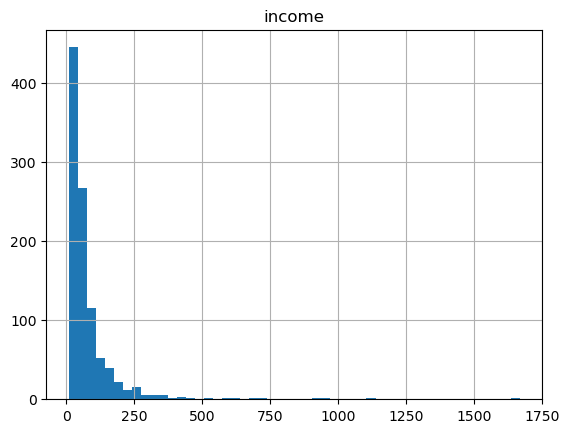

In [13]:
df.hist(column='income', bins=50)

## Conjunto de características

Vamos definir conjuntos de recursos, X:

In [15]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Para usar a biblioteca scikit-learn, temos que converter o quadro de dados Pandas em um array Numpy:

In [17]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat']]
x[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Quais são os nossos rótulos?

In [18]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalizar dados

A padronização de dados fornece média zero e variância unitária aos dados, é uma boa prática, especialmente para algoritmos como KNN, que se baseia na distância dos pontos de dados:

In [19]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004,  0.45813963],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794, -1.32797979],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577,  0.45813963]])

## Divisão de teste de treino

Precisão fora da amostra é a porcentagem de previsões corretas que o modelo faz em dados nos quais o modelo NÃO foi treinado. Fazer um treinamento e um teste no mesmo conjunto de dados provavelmente terá baixa precisão fora da amostra, devido à probabilidade de ajuste excessivo de nosso modelo.

É importante que os nossos modelos tenham uma elevada precisão fora da amostra, porque o objectivo de qualquer modelo, claro, é fazer previsões correctas sobre dados desconhecidos. Então, como podemos melhorar a precisão fora da amostra? Uma maneira é usar uma abordagem de avaliação chamada Divisão de Treinamento/Teste. A divisão de treinamento/teste envolve a divisão do conjunto de dados em conjuntos de treinamento e teste, respectivamente, que são mutuamente exclusivos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de testes.

Isso fornecerá uma avaliação mais precisa da precisão fora da amostra porque o conjunto de dados de teste não faz parte do conjunto de dados que foi usado para treinar o modelo. É mais realista para os problemas do mundo real.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (800, 12) (800,)
Test Set:  (200, 12) (200,)


## Classificação

### K vizinho mais próximo (KNN)

#### Importar biblioteca

Classificador implementando a votação dos k-vizinhos mais próximos.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

## Treinamento

Vamos começar o algoritmo com k=4 por enquanto:

In [22]:
k = 4

# treinar o modelo e predizer
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

## Previsão

Podemos usar o modelo para fazer previsões no conjunto de testes:

In [23]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 1, 1, 2, 4], dtype=int64)

## Avaliação de precisão

Na classificação multirrótulo, a pontuação de classificação de precisão é uma função que calcula a precisão do subconjunto. Esta função é igual à função jaccard_score. Essencialmente, ele calcula a correspondência entre os rótulos reais e os rótulos previstos no conjunto de teste.

In [24]:
from sklearn import metrics
print('Train Set Accuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test Set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train Set Accuracy:  0.82875
Test Set Accuracy:  0.735


## Exercício

Você pode construir o modelo novamente, mas desta vez com k=6?

In [26]:
k = 6

neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.8125
Test set Accuracy:  0.755


E quanto a outro K?

K em KNN é o número de vizinhos mais próximos a serem examinados. Deve ser especificado pelo usuário. Então, como podemos escolher o valor certo para K? A solução geral é reservar uma parte dos seus dados para testar a precisão do modelo. Em seguida, escolha k = 1, use a parte de treinamento para modelagem e calcule a precisão da previsão usando todas as amostras do seu conjunto de teste. Repita esse processo, aumentando k, e veja qual k é o melhor para o seu modelo.

Podemos calcular a precisão do KNN para diferentes valores de k.

In [27]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.76 , 0.68 , 0.725, 0.735, 0.73 , 0.755, 0.775, 0.77 , 0.765])